<a href="https://colab.research.google.com/github/GigiQR99/CV-Class3-Streamlit/blob/main/04_02_Writing_Videos_maddog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WRITTING VIDEOS**

While building applications that involve video streams, it is often required to write videos. For example, in a surveillance application, you might want to save a video clip as soon as you see something unusual happening. Writing videos can also be useful during the development phase to help debug your code or to create demos of your work.

In this notebook, we will describe how to save a video in **`avi`** and **`mp4`** formats using openCV. We will also demonstrate how to annotate video frames.

In [1]:
!git clone https://github.com/GigiQR99/CV-Lee

fatal: destination path 'CV-Lee' already exists and is not an empty directory.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



### <font style="color:rgb(50,120,230)">Preview video</font>

In [3]:
# Install moviepy from your terminal or powershell.
# pip install moviepy
from moviepy.editor import VideoFileClip

input_video = '/content/CV-Lee/Mod4/whatadog.mp4'

# loading output video
clip = VideoFileClip(input_video)
clip.ipython_display(width = 500)

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



t:  93%|█████████▎| 119/128 [00:01<00:00, 119.33it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file /content/CV-Lee/Mod4/whatadog.mp4, 1198080 bytes wanted but 0 bytes read,at frame 125/128, at time 4.17/4.25 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+

  warnings.warn("Warning: in file %s, "%(self.filename)+

  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready __temp__.mp4


# 1. Read Video from Source

Before we demonstrate how to write a video, we will first need to read a video file into memory so we have a video stream to write. Reading videos requires the creation of a video capture object using the `VideoCapture()` class.

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">Function Syntax</font>
```python
VideoCapture object = cv2.VideoCapture(filename[, apiPreference])

```
The function has **1 required argument**:

1. `filename`: Name of the input video file.

There is also another common usage that allows you to specifify an index to access the video stream from a camera mounted to your computer. If you computer has a web camera, then it can be acessed using an index of `0`.
```python
VideoCapture object = cv2.VideoCapture(index[, apiPreference])
```

### <font color="green">OpenCV Documentation</font>


[**`VideoCapture()`**](https://docs.opencv.org/4.5.2/d8/dfe/classcv_1_1VideoCapture.html)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

## 1.1 Create the video capture object

In [4]:
source = input_video  # source = 0 for webcam

video_cap = cv2.VideoCapture(source)
if (video_cap.isOpened()== False):
  print("Never trust a little dog!!!")

### <font style="color:rgb(50,120,230)">Read and display the first frame of the video</font>

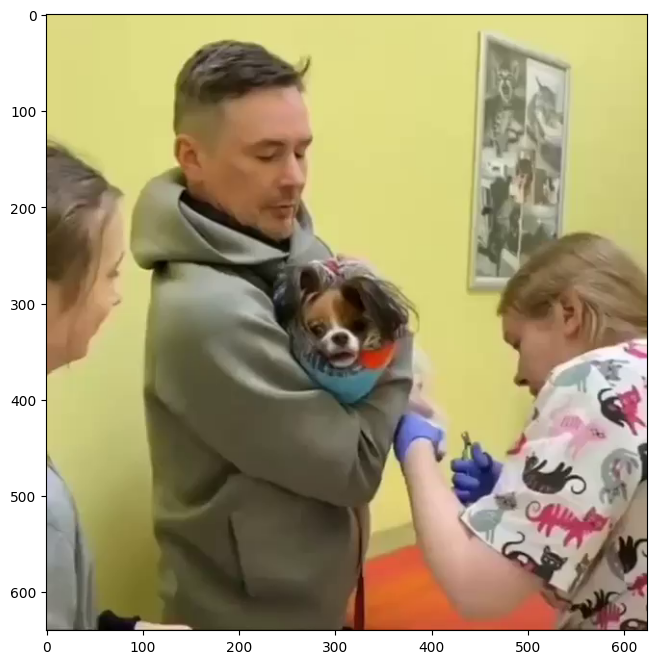

In [5]:
ret, frame = video_cap.read()
plt.figure(figsize = (10, 8))
plt.imshow(frame[...,::-1])

# 2. Writing Videos

Writing videos requires the creation of a video writer object using the `VideoWriter()` class.

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">Function Syntax</font>
```python
VideoWriter object = cv2.VideoWriter(filename, fourcc, fps, frameSize[, isColor])
```
The function has **4 required arguments**:

1. `filename`: Name of the output video file.
2. `fourcc`: 4-character code of codec used to compress the frames. For example, VideoWriter::fourcc('P','I','M','1') is a MPEG-1 codec, VideoWriter::fourcc('M','J','P','G') is a motion-jpeg codec etc. List of codes can be obtained at Video Codecs by FOURCC page. FFMPEG backend with MP4 container natively uses other values as fourcc code: see ObjectType, so you may receive a warning message from OpenCV about fourcc code conversion.
3. `fps`: Framerate of the created video stream.
4. `frameSize`: Size of the video frames.

### <font color="green">OpenCV Documentation</font>


[**`VideoWriter()`**](https://docs.opencv.org/4.5.2/dd/d9e/classcv_1_1VideoWriter.html)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

## 2.1 Create the video writer object
#### This code **reads video properties, slows video down**, and **prepares 2 output video files (AVI and MP4)** to save processed frames.


1. Gets the video’s **width, height, and FPS**.
2. Sets **codecs (FourCC):** FourCC specifies how video is compressed in either AVI and MP4 formats:
   * MJPG is used for AVI files.
   * XVID is commonly used for MP4 files.
3. Defines **output video file names** ('video_out.avi', 'video_out.mp4')
4. **Reduces FPS to 1/3** to slow the video down.
5. Creates **VideoWriter objects** to save the processed video frames:
* Initializes two video writers (AVI and MP4).
* Uses the chosen codec, slowed FPS, and original frame size.
* These are used to write frames into new video files.


In [6]:
# Retrieve video frame properties.
frame_w   = int(video_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_h   = int(video_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_fps = int(video_cap.get(cv2.CAP_PROP_FPS))

# Specify the value for fourcc
fourcc_avi = cv2.VideoWriter_fourcc('M','J','P','G')
fourcc_mp4 = cv2.VideoWriter_fourcc(*'XVID')

# Specify the video output filenames.
file_out_avi = 'video_maddog_out.avi'
file_out_mp4 = 'video_maddog_out.mp4'

# Slow down the speed of the video.
frame_fps = int(frame_fps/3)

# Create the video writer objects.
out_avi = cv2.VideoWriter(file_out_avi, fourcc_avi, frame_fps, (frame_w,frame_h))
out_mp4 = cv2.VideoWriter(file_out_mp4, fourcc_mp4, frame_fps, (frame_w,frame_h))

## 2.2 Loop over video frames and write each one to the output file

> ### **Function for annotating video frames**
> Fxn adds a readable text banner at the top of each video frame.
* Defines a function that **draws a banner with text** on top of a video frame.
* Calculates the **banner height** as a percentage of the frame height.
* Draws a **solid black rectangle** across the top of the frame.
* Places **text on the banner**, slightly offset from the left.
* Uses OpenCV’s font settings to control **size, color, and thickness** of the text.


In [7]:
def drawBannerText(frame, text, banner_height_percent = 0.05, text_color = (0,255,0)):
    # Draw a black filled banner across the top of the image frame.
    # percent: set the banner height as a percentage of the frame height.
    banner_height = int(banner_height_percent * frame.shape[0])
    cv2.rectangle(frame, (0,0), (frame.shape[1],banner_height), (0,0,0), thickness=-1)

    # Draw text on banner.
    left_offset = 20
    location = (left_offset, int( 5 + (banner_height_percent * frame.shape[0])/2 ))
    fontScale = 1.5
    fontThickness = 2
    cv2.putText(frame, text, location, cv2.FONT_HERSHEY_PLAIN, fontScale, text_color, fontThickness, cv2.LINE_AA)

### **Process video frames**

> #### **Release the video capture and video writer objects**
>**In short:** it reads, labels, and saves every frame of the video:

1. Loops through the video **frame by frame**.
2. Reads one frame at a time; stops when no frames are left.
3. **Counts each frame** as it’s read.
4. Adds a **text banner** showing the frame number and FPS.
5. Writes the annotated frame to **AVI and MP4 output videos**.




In [8]:
# Read all the frames in the video.
frame_count = 0
while True:

    # Read one frame at a time.
    ok, frame = video_cap.read()
    if not ok:
        break

    # Increment the frame count for the annotation.
    frame_count += 1

    # Annotate each video frame.
    drawBannerText(frame, 'Frame: ' + str(int(frame_count)) + ' FPS: ' + str(int(frame_fps)))

    # Write the frame to the output files.
    out_avi.write(frame)
    out_mp4.write(frame)

#### This code: **close all video files and free system resources**.

* `video_cap.release()`
  Releases the video capture object and **closes the input video file**.

* `out_avi.release()`
  Finishes writing and **saves the AVI output video**.

* `out_mp4.release()`
  Finishes writing and **saves the MP4 output video**.

In [9]:
# Release the VideoCapture and VideoWriter objects
video_cap.release()
out_avi.release()
out_mp4.release()

# 3. Load the newly created video to confirm creation

In [10]:
clip = VideoFileClip(file_out_mp4)
clip.ipython_display(width = 400)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4
